In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
import os,sys
# calculate accuracy measures and confusion matrix
from sklearn import metrics

sns.set(color_codes=True)
%matplotlib inline

### 1. Read the column description and ensure you understand each attribute well


In [253]:
df=pd.read_csv(r"C:\Users\keert\Downloads\Bank_Personal_Loan_Modelling.csv")

In [254]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###### Experience has a min. value of -3 that means it has got negative values, therefore wer need to clean data.

In [256]:
df[df['Experience']<0].Experience.count()
### There are 52 negative entries

52

In [257]:
df[df['Experience']<0].Experience.value_counts()
#there are 3 unique negative entries.

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [258]:
# Let us find the unique ages which have -1, -2 and -3 entries in the Experience column
df[df['Experience'] == -1]['Age'].value_counts()

25    17
24     6
23     6
29     3
26     1
Name: Age, dtype: int64

In [259]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -1 value
l1 = df[df['Experience'] == -1]['Age'].value_counts().index.tolist()
ind_1 = df[df['Experience'] == -1]['Experience'].index.tolist()
for i in ind_1:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l1)) & (df.Experience > 0)].Experience.mean()

In [260]:
# Let us check the values are correctly replaced.
df[df['Experience'] == -1]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [261]:
df[df['Experience'] == -2]['Age'].value_counts()


24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [262]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -2 value
l2 = df[df['Experience'] == -2]['Age'].value_counts().index.tolist()
ind_2 = df[df['Experience'] == -2]['Experience'].index.tolist()
for i in ind_2:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l2)) & (df.Experience > 0)].Experience.mean()

In [263]:
df[df['Experience'] == -3]['Age'].value_counts()

23    2
24    2
Name: Age, dtype: int64

In [264]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -3 value
l3 = df[df['Experience'] == -3]['Age'].value_counts().index.tolist()
ind_3 = df[df['Experience'] == -3]['Experience'].index.tolist()
for i in ind_3:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l3)) & (df.Experience > 0)].Experience.mean()

In [265]:
df.Experience.describe()
#data has been cleaned

count    5000.000000
mean       20.149833
std        11.391004
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [267]:
df.shape

(5000, 14)

In [268]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [269]:
df.duplicated().sum()

0

### 2. Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights

<AxesSubplot:xlabel='Income', ylabel='Density'>

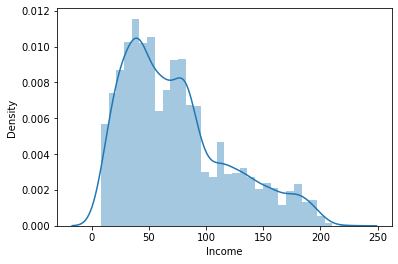

In [17]:
sns.distplot(df['Income']) #Distribution of income


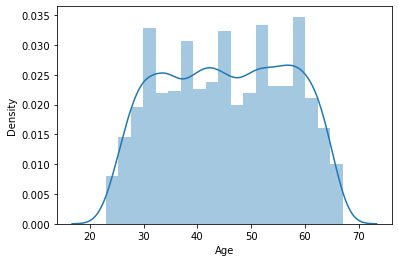

In [18]:
sns.distplot(df["Age"]) #Distribution of Age
plt.show()

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

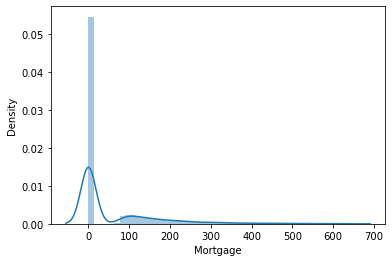

In [20]:
sns.distplot(df["Mortgage"]) #Distribution of Mortgage

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

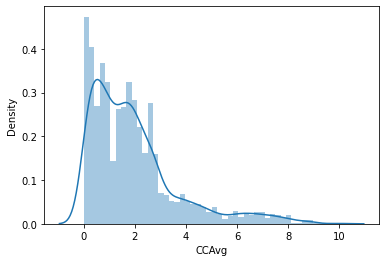

In [21]:
#Distribution of credit Card Average
sns.distplot(df["CCAvg"])

<AxesSubplot:xlabel='Experience', ylabel='Density'>

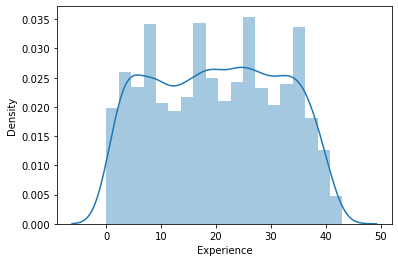

In [22]:
#Distribution of Experience
sns.distplot(df['Experience'])

<AxesSubplot:xlabel='Family', ylabel='count'>

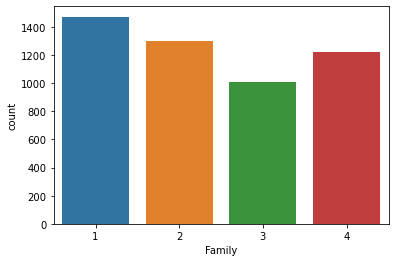

In [23]:
# Count Plot to show Family Distributions
sns.countplot(x='Family',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

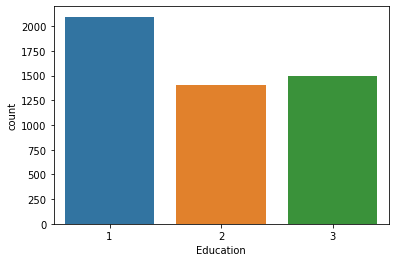

In [24]:
# Count Plot to show Education Distributions
sns.countplot(x='Education',data=df)

majority of the customers are undergrads.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

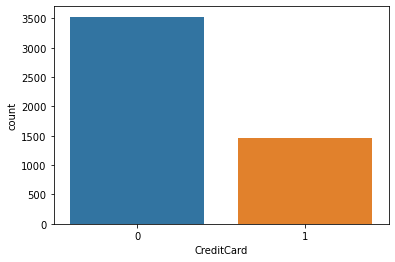

In [25]:
#Count Plot to show CreditCard Distributions
sns.countplot(x='CreditCard',data=df)

<AxesSubplot:xlabel='Online', ylabel='count'>

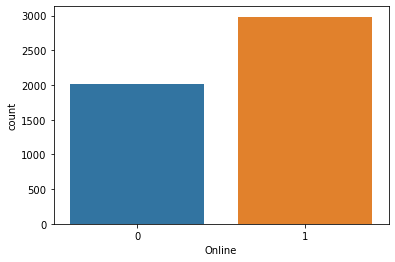

In [26]:
#  Count Plot to show Online Distributions
sns.countplot(x='Online',data=df)


### 3. Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute (5 points)

<AxesSubplot:>

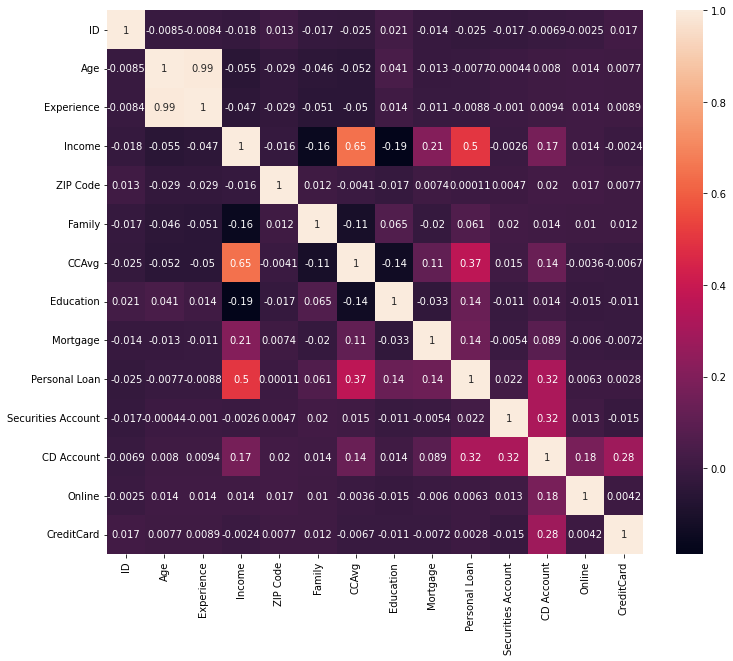

In [27]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

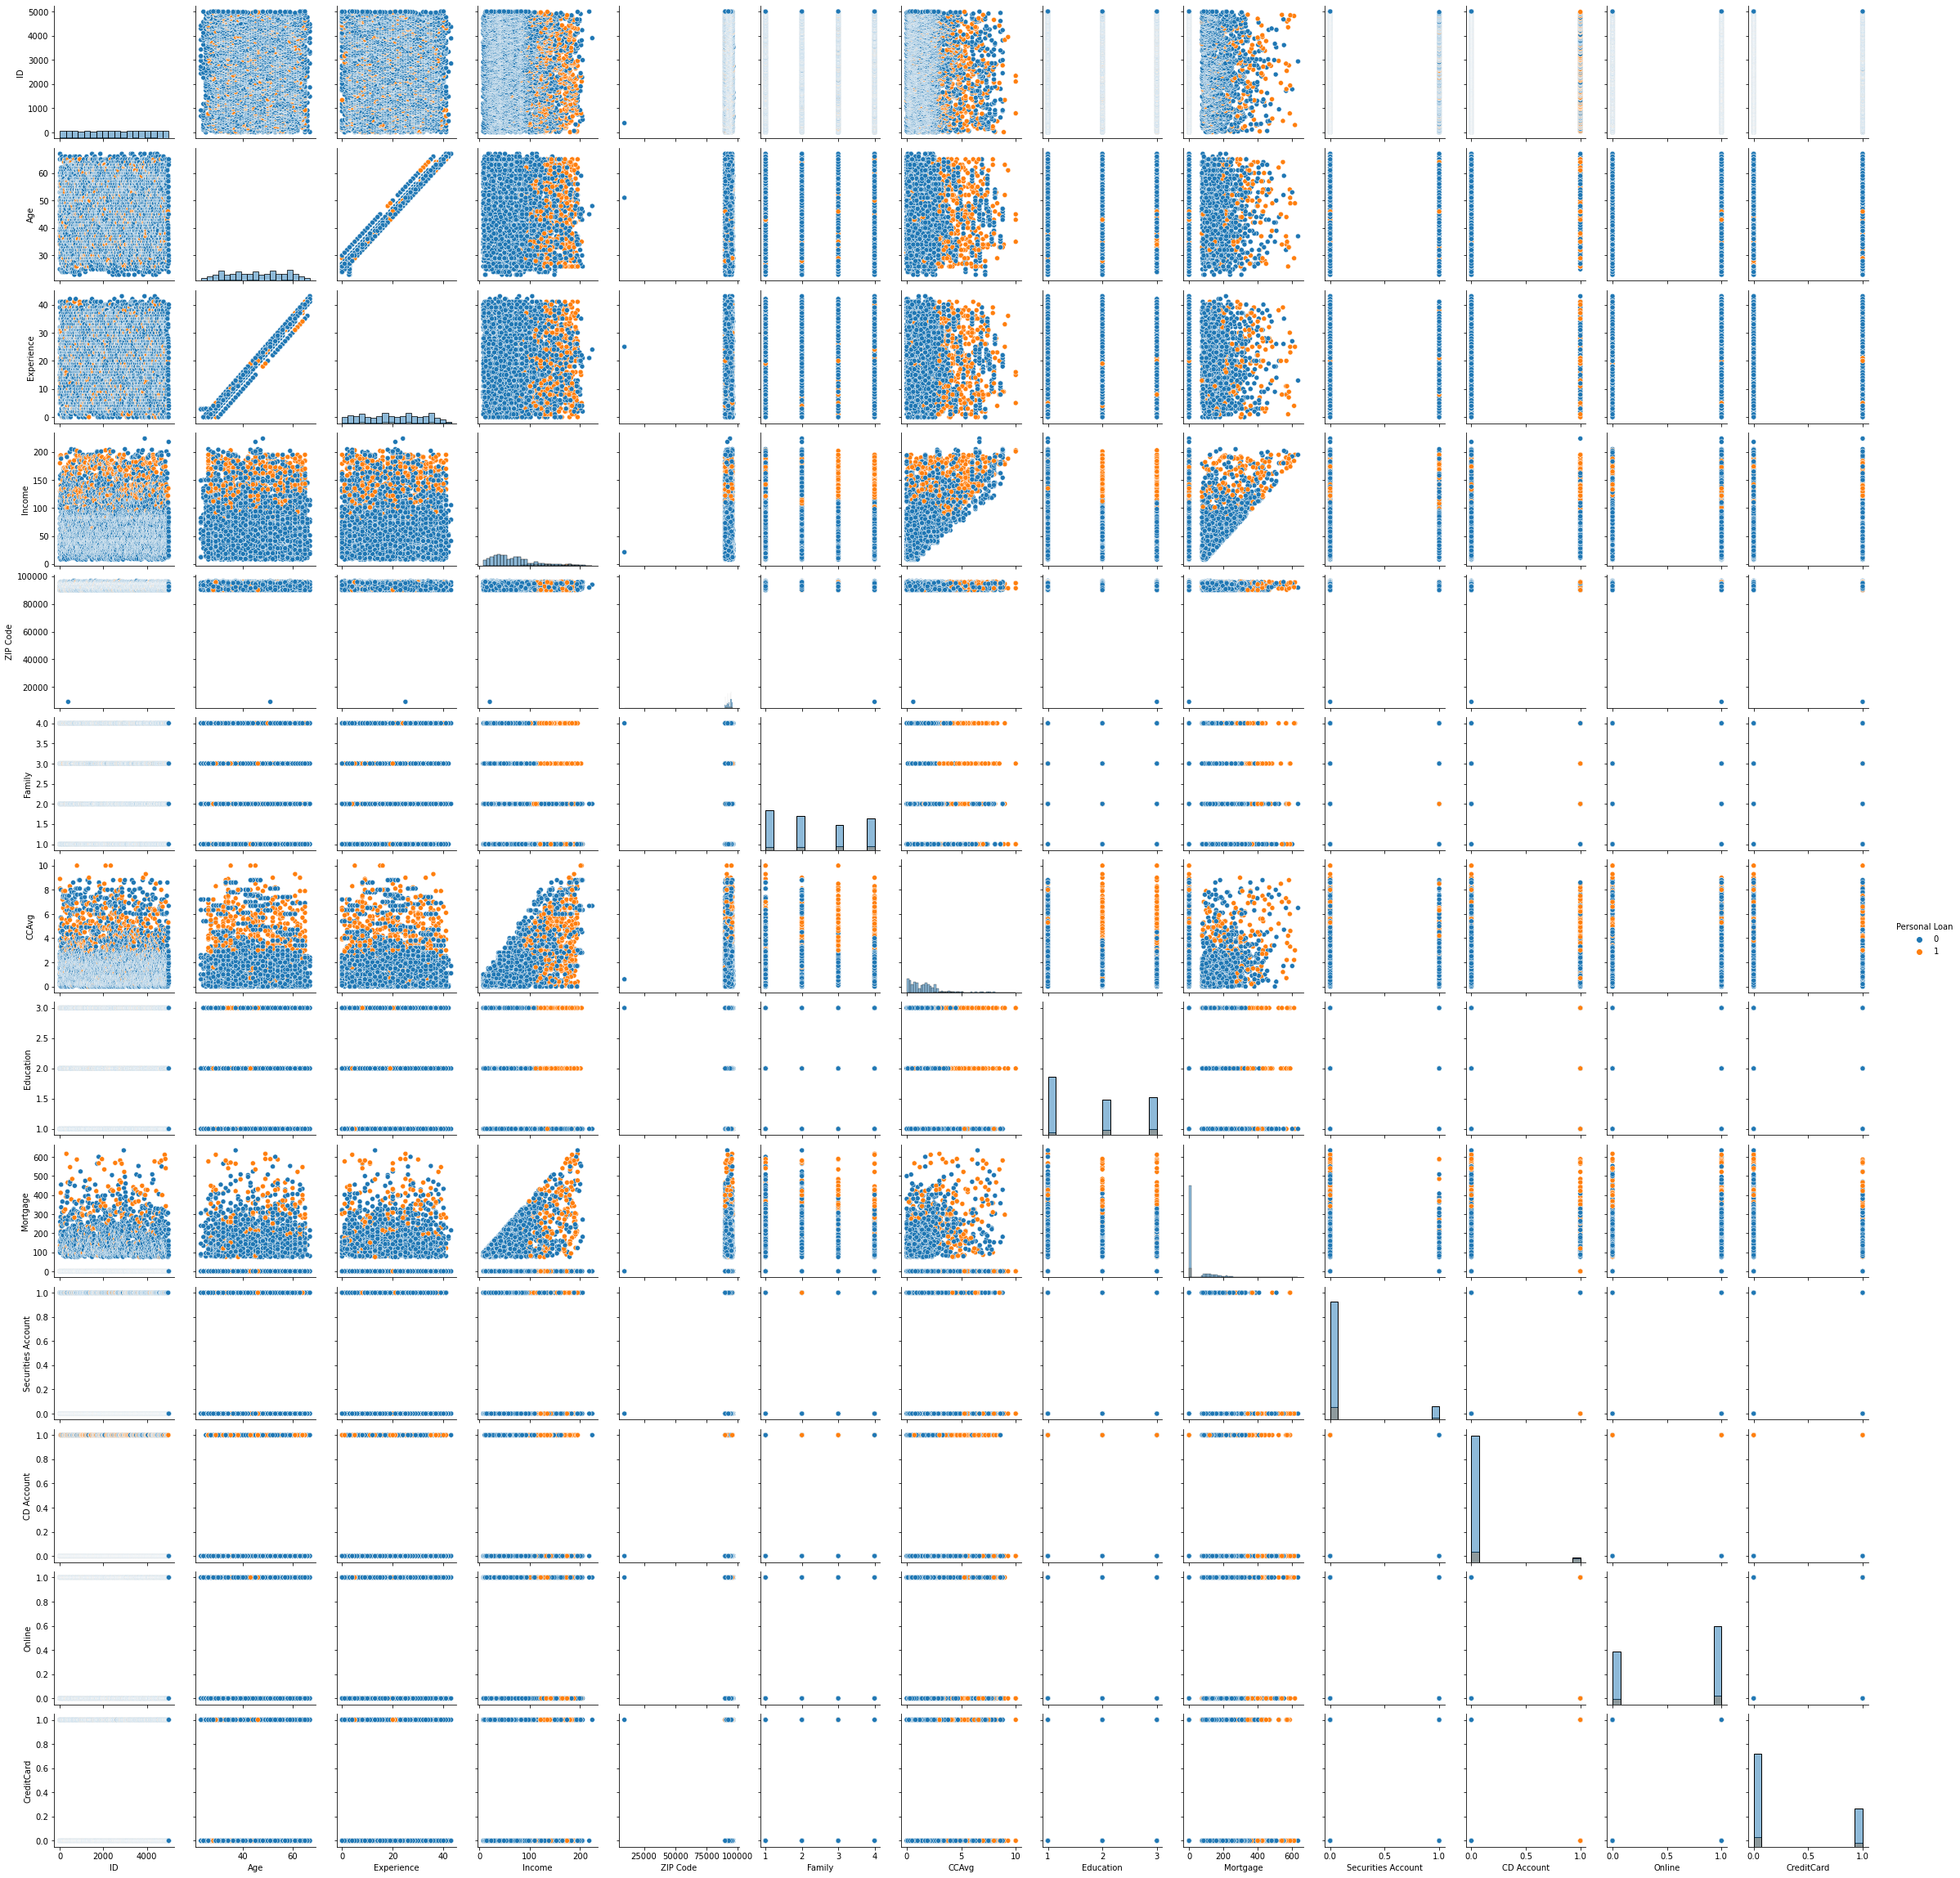

In [32]:
sns.pairplot(df,hue='Personal Loan',diag_kind='hist')

### 4. One hot encode the Education variable (3 points)

In [36]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [35]:
#one hot encoding education
df_encoded = pd.get_dummies(df, columns = ['Education'])
df_encoded

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1.0,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19.0,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15.0,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9.0,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8.0,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,0,0,0,0,1,0,0,0,1
4996,4997,30,4.0,15,92037,4,0.4,85,0,0,0,1,0,1,0,0
4997,4998,63,39.0,24,93023,2,0.3,0,0,0,0,0,0,0,0,1
4998,4999,65,40.0,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [41]:
df_encoded.shape

#no. of columns increased from 14 to 16

(5000, 16)

### 5. Separate the data into dependant and independent variables and create training and test sets out of them (X_train, y_train, X_test, y_test) (2 points)

In [63]:
# Train test split
# We will drop the Experience, ID, CCAvg columns from training as well as test dataset
X = df_encoded.drop(['Experience' ,'ID' ,'CCAvg'],axis=1)
Y = df_encoded['Personal Loan']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [65]:
X_train.describe()


,Age,Income,ZIP Code,Family,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.160571,73.613429,93148.826286,2.401143,56.302857,0.097714,0.104571,0.063714,0.597143,0.297143,0.416857,0.278000,0.305143
std,11.558267,46.046412,2257.759153,1.144690,100.973751,0.296970,0.306044,0.244278,0.490543,0.457065,0.493109,0.448077,0.460534
min,23.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91933.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93422.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,100.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X_test.describe()

,Age,Income,ZIP Code,Family,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.753333,74.149333,93161.082000,2.385333,56.956000,0.092000,0.104000,0.052667,0.596000,0.286667,0.424667,0.286667,0.288667
std,11.230995,46.017288,1765.157149,1.154877,103.452558,0.289122,0.305362,0.223442,0.490861,0.452355,0.494457,0.452355,0.453294
min,23.000000,8.000000,90005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,39.000000,91911.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93437.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,103.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6. Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set) (5 points)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7.Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set (5 points)

In [224]:
#function is built, but it will run only when we will use a specific ML model in the coming cells.
def modelresult(model_name):
    df_table = confusion_matrix(y_test,pred_test)
    a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f = (2 * p * r) / (p + r)
    s= df_table[0,0] / (df_table[0,0] + df_table[0,1])
    return model_name, round(a,2),round(p,2), round(r,2), round(f,2), round(s,2)

   

In [225]:
attributes = ["model name","accuracy","precision","recall/sensitivity","F1 score","Specificity"]

### 8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model (15 points)

#### Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [227]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9093333333333333


In [228]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = logisticRegr.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1316,90
Yes,46,48


In [229]:
LRresults=modelresult("Logistic Regression")
res = "\n".join("{} {}".format(x, y) for x, y in zip(attributes, LRresults))
print(res)

model name Logistic Regression
accuracy 0.91
precision 0.51
recall/sensitivity 0.35
F1 score 0.41
Specificity 0.97


In [230]:
#### KNN Classifier

In [231]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.904


In [232]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1323,105
Yes,39,33


In [233]:
#now using the above function
knnresults=modelresult("KNN")
res = "\n".join("{} {}".format(x, y) for x, y in zip(attributes, knnresults))
print(res)

model name KNN
accuracy 0.9
precision 0.46
recall/sensitivity 0.24
F1 score 0.31
Specificity 0.97


#### Naive Bayes Classifier

In [234]:
from sklearn.naive_bayes import MultinomialNB
nbaiyes = MultinomialNB().fit(X_train, y_train)

In [235]:
# Use score method to get accuracy of model
score = nbaiyes.score(X_test, y_test)
print(score)

0.7833333333333333


In [236]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = nbaiyes.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1092,55
Yes,270,83


In [237]:
nbresults=modelresult("Naive Bayes")
res = "\n".join("{} {}".format(x, y) for x, y in zip(attributes, nbresults))
print(res)

model name Naive Bayes
accuracy 0.78
precision 0.24
recall/sensitivity 0.6
F1 score 0.34
Specificity 0.8


#### Decision Tree Classifier

In [238]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [239]:
dt= DecisionTreeClassifier(random_state=0, max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [240]:
pred_test=dt.predict(X_test)

In [241]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1362,0
Yes,0,138


In [242]:
#now using the above function
dtresults=modelresult("Decision Tree")
res = "\n".join("{} {}".format(x, y) for x, y in zip(attributes, dtresults))
print(res)

model name Decision Tree
accuracy 1.0
precision 1.0
recall/sensitivity 1.0
F1 score 1.0
Specificity 1.0


### 9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”. Populate the dataframe accordingly (5 points)

In [243]:
model=["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree"]

In [246]:
df = pd.DataFrame(list(zip(LRresults, knnresults,nbresults,dtresults)),
               columns =model)
df.index=attributes
final_result=df.T.reset_index(drop=True)
final_result

,model name,accuracy,precision,recall/sensitivity,F1 score,Specificity
0,Logistic Regression,0.91,0.51,0.35,0.41,0.97
1,KNN,0.9,0.46,0.24,0.31,0.97
2,Naive Bayes,0.78,0.24,0.6,0.34,0.8
3,Decision Tree,1.0,1.0,1.0,1.0,1.0


### 10. Give your reasoning on which is the best model in this case (5 points)